In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot
from scipy.linalg import expm

import numpy.random as R

# Brownian motion

Let's plot Brownian motion in 1D & 2D and calculate some expectation values.

$$x_{n+1}=x_n+\mathrm{Random}[-1,1]$$
$$y_{n+1}=y_n+\mathrm{Random}[-1,1]$$

Let's calculate:
$$
\langle R^2 \rangle \propto N
$$

In [2]:
# for 1D & 2D cases
Nst = 10000 # number of steps
Ntr = 500   # number of trajectories

# 1D Brownian Motion

In [3]:
a = np.zeros((Ntr,Nst), dtype=float)

for i in range(Ntr):
    dx = 0
    for j in range(Nst):
        a[i,j] = dx
        dx+= (R.random()-1/2)*2

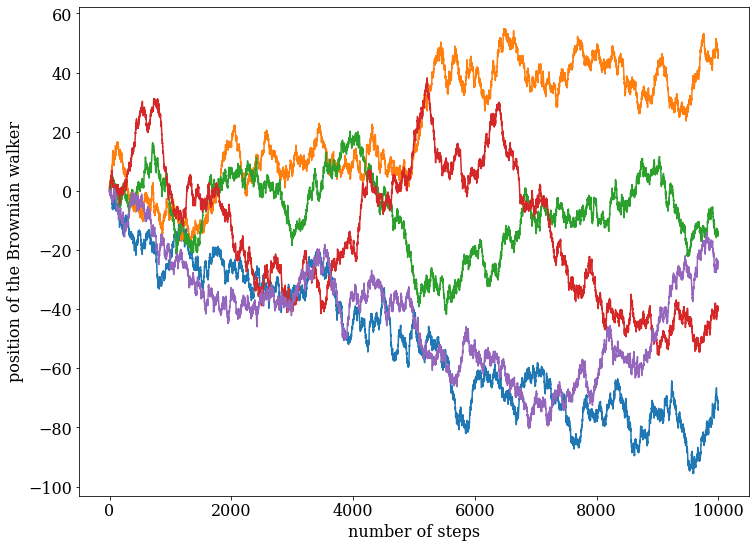

In [4]:
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16,'font.family':'serif'})
fig, ax = plt.subplots(figsize=(12, 9))

plt.plot(a[0,:])
plt.plot(a[5,:])
plt.plot(a[21,:])
plt.plot(a[101,:])
plt.plot(a[203,:])


plt.xlabel('number of steps')
plt.ylabel('position of the Brownian walker')

plt.show()

In [5]:
mean_1d = a.sum(axis=0)/Ntr
var_1d  = (a*a).sum(axis=0)/Ntr

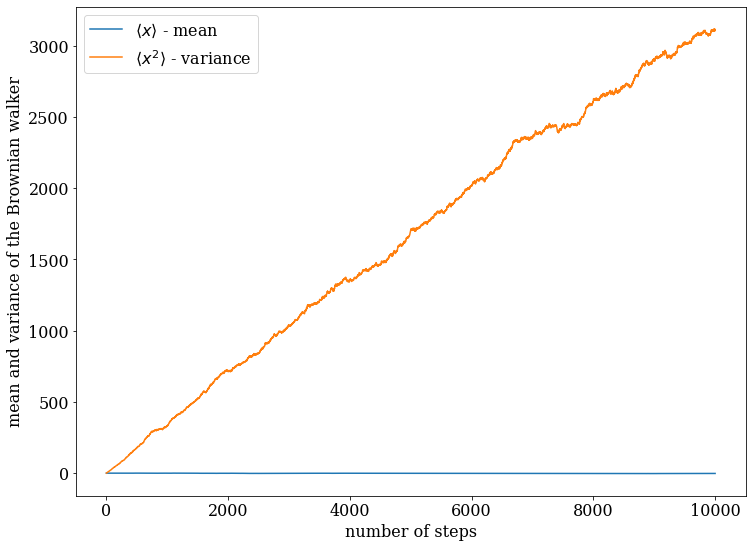

In [6]:
fig, ax = plt.subplots(figsize=(12, 9))

plt.plot(mean_1d, label = r'$\langle x \rangle$ - mean')
plt.plot(var_1d, label = r'$\langle x^2 \rangle$ - variance')


plt.xlabel('number of steps')
plt.ylabel('mean and variance of the Brownian walker')
plt.legend(loc = "best",numpoints=1,frameon=True)

plt.show()

# 2D Brownian Motion

In [7]:
a = np.zeros((Ntr,Nst), dtype=float)
b = np.zeros((Ntr,Nst), dtype=float)

for i in range(Ntr):
    dx = 0
    dy = 0
    for j in range(Nst):
        a[i,j] = dx
        b[i,j] = dy
        dx+= (R.random()-1/2)*2
        dy+= (R.random()-1/2)*2        

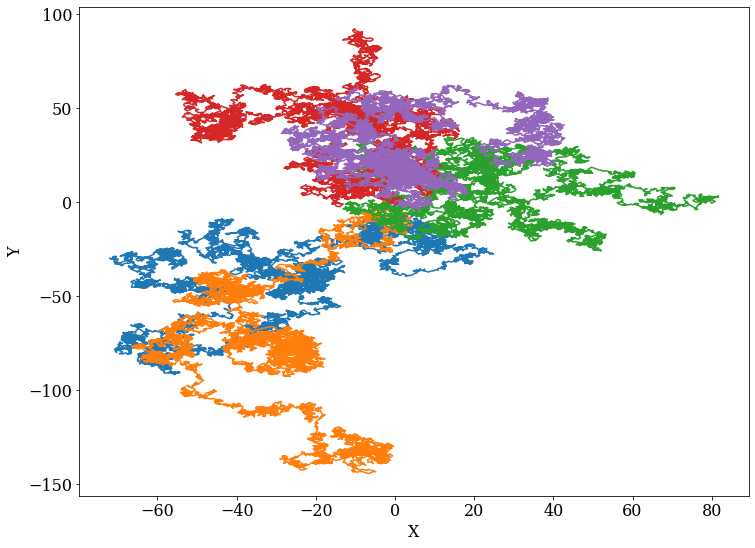

In [8]:
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16,'font.family':'serif'})
fig, ax = plt.subplots(figsize=(12, 9))

plt.plot(a[0,:], b[0,:])
plt.plot(a[5,:],b[5,:])
plt.plot(a[21,:],b[21,:])
plt.plot(a[101,:],b[101,:])
plt.plot(a[203,:],b[203,:])


plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [9]:
am = a.sum(axis=0)/Ntr
bm = b.sum(axis=0)/Ntr

mean_2d = np.sqrt(am*am+bm*bm)
rms_2d = np.sqrt(a*a+b*b).sum(axis=0)/Ntr
var_2d  = (a*a+b*b).sum(axis=0)/Ntr

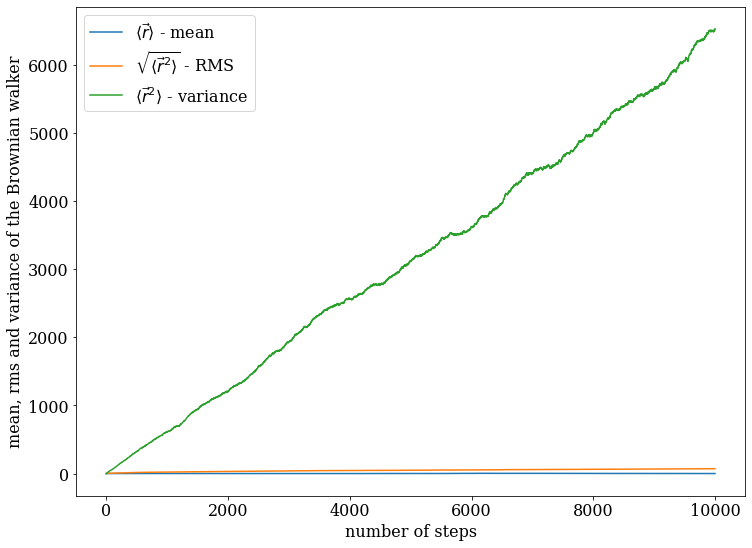

In [10]:
fig, ax = plt.subplots(figsize=(12, 9))

plt.plot(mean_2d, label = r'$\langle \vec{r} \rangle$ - mean')
plt.plot(rms_2d, label = r'$\sqrt{\langle \vec{r}^2 \rangle}$ - RMS')
plt.plot(var_2d, label = r'$\langle \vec{r}^2 \rangle$ - variance')


plt.xlabel('number of steps')
plt.ylabel('mean, rms and variance of the Brownian walker')
plt.legend(loc = "best",numpoints=1,frameon=True)

plt.show()

# Unravelling QHO at T=0

for simplicity $H=0$ and initial state $|\psi_0\rangle=|n\rangle$

QME to be unravelled:
$$
\frac{d}{dt}\rho=\gamma\left(a\rho a^{+}-\frac{1}{2}\{a^{+} a, \rho\}\right)
$$

the observable $n(t)=\langle a^+ a \rangle = n e^{-\gamma t}$

We will keep the record of the number of photons in a given trajectory:
for $r\in [0,1]$ (random number) and small time step:
$$
\begin{cases}
\mathrm{if} p<r, \mathrm{keep}\quad |k\rangle, \\
\mathrm{if} p>r, \mathrm{jump}\quad |k-1\rangle.
\end{cases}
$$

In [11]:
# parameters, time measured in \gmma*t
gd = 0.01 # time step
tf = 5    # total simulation time
Nst = int(tf/gd) # number of steps
Ntr = 100   # number of trajectories

nph = 5 # initial number of photons in Fock state

In [12]:
traj = np.zeros((Ntr,Nst+1), dtype=float)

#initial condition
traj[:,0]=nph
for ind_tr in range(Ntr):
    for step in range(Nst):
        r = R.random()
        p = gd*traj[ind_tr,step]
        if p>r:
            traj[ind_tr,step+1] = traj[ind_tr,step]-1
        else:
            traj[ind_tr,step+1] = traj[ind_tr,step]

In [13]:
traj[10,:]

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0.

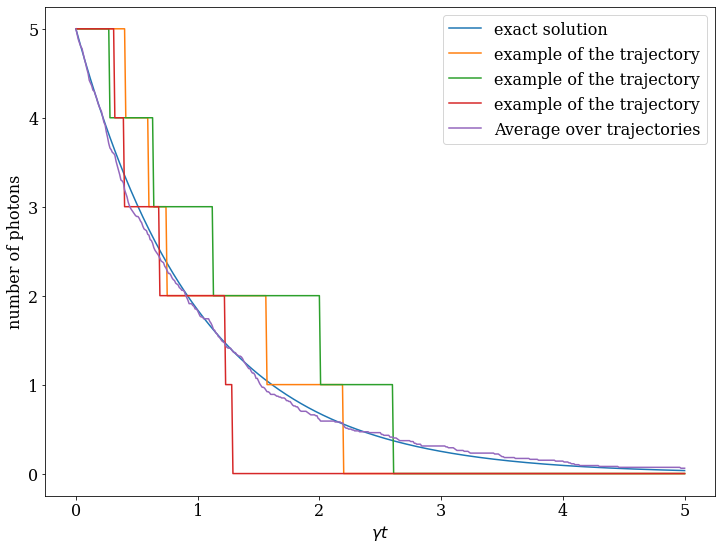

In [14]:
fig, ax = plt.subplots(figsize=(12, 9))

t=np.linspace(0,5,Nst+1)
plt.plot(t,nph*np.exp(-t), label = 'exact solution')
plt.plot(t,traj[10,:], label = 'example of the trajectory')
plt.plot(t,traj[20,:], label = 'example of the trajectory')
plt.plot(t,traj[91,:], label = 'example of the trajectory')
plt.plot(t,traj.sum(axis=0)/Ntr, label = 'Average over trajectories')

plt.xlabel(r'$\gamma t$')
plt.ylabel('number of photons')
plt.legend(loc = "best",numpoints=1,frameon=True)

plt.show()

Problem: Try to adopt the code to this case;
Keep in mind that now you will need to store full wave-function (array of 2 complex numbers)

We consider a Quantum Master equation for a weakly driven two-level atom in a zero temperature reservoir:
$$\frac{d \rho}{dt}=\mathcal{L}\rho,$$
where
$$\mathcal{L}\rho =-\imath[H_s,\rho]+\gamma\left(\sigma_-\rho\sigma_++\frac{1}{2}\left\{\sigma_+\sigma_-,\rho\right\}\right)$$
and
$$
H_s = \frac{\Delta}{2}\sigma_z+ \Omega \sigma_x,
$$
where $\Delta = \omega_0-\omega_D$ and $\Omega$ is the amplitude of the driving field.